In [1]:
class Document(object):
    
    def __init__(self,id, title, authors, venue, year, n_citation, references =[], abstract ='', *args, **kwargs ):
        self.id = id
        self.title = title
        self.authors = authors
        self.venue = venue
        self.year = year
        self.n_citation = n_citation
        self.references = references
        self.abstract = abstract
        
    def __str__(self):
        return str(self.id)

    def __hash__(self):
        return hash(str(self))
    
    def __repr__(self):
        return str(self.id)
    
    def __gt__(self, other):       
        return self.n_citation>other.n_citation
    
    def __lt__(self, other):       
        return self.n_citation<other.n_citation
    
    def __eq__(self, other):       
        return self.n_citation==other.n_citation
    
    def __ne__(self, other):       
        return self.n_citation!=other.n_citation
    

<Figure size 576x432 with 0 Axes>

{1: 0.039155034535273574,
 2: 0.050601462803500315,
 3: 0.0464958942456149,
 4: 0.027746143266238338,
 5: 0.0664865279403267,
 6: 0.027746143266238338,
 7: 0.04728643378670879,
 8: 0.039559661582082795,
 9: 0.030119953631097054,
 10: 0.02369801439916884,
 11: 0.028070248620377148,
 12: 0.03006499758385747,
 13: 0.02369801439916884,
 14: 0.02369801439916884,
 15: 0.047751889589958955,
 16: 0.026537653680862493,
 17: 0.03490429543989943,
 18: 0.02369801439916884,
 19: 0.03051909385340579,
 20: 0.03568126234558784,
 21: 0.03464329692057542,
 22: 0.032888896666327036,
 23: 0.024957785138914997,
 24: 0.02369801439916884,
 25: 0.028966496399165435,
 26: 0.02369801439916884,
 27: 0.03433711202543167,
 28: 0.03075481207519711,
 29: 0.038838803809176585,
 30: 0.02369801439916884}

Enter a top number: 5


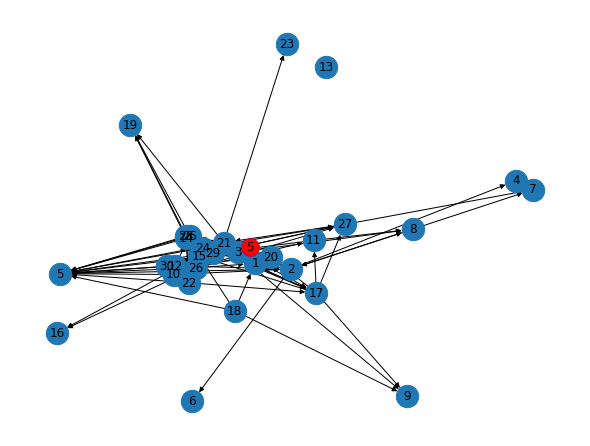

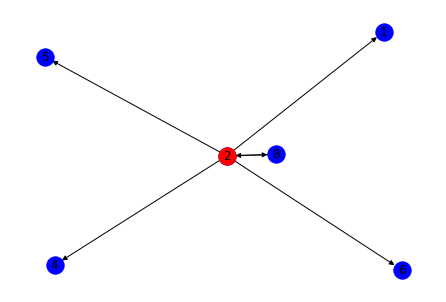

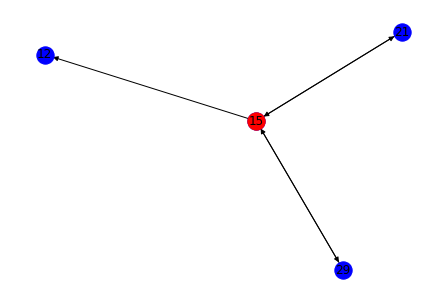

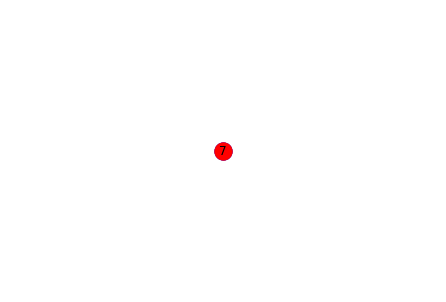

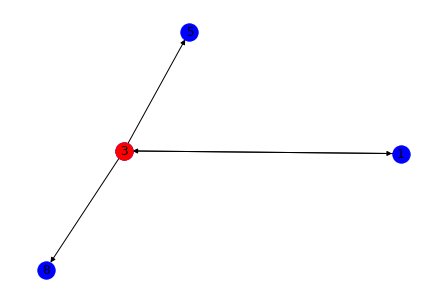

Le graph Ginf des 5 top noeuds


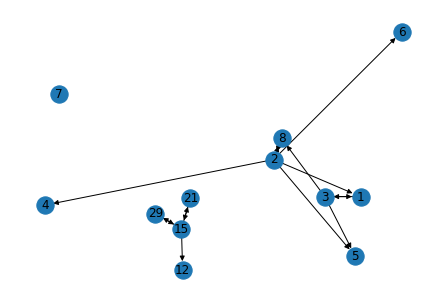

In [3]:
# importing networkx 
import networkx as nx 

import json 

from operator import itemgetter

# importing matplotlib.pyplot 
import matplotlib.pyplot as plt 

from numpy import random

# to display all outputs (not only the last one))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import collections

import pandas as pd

import numpy as np

# to center figure on display
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

from collections import namedtuple


# function that return the "nb" top first elements
def sort_top(pr,top_nb):
    sorted_pr = sorted(pr.items(), key=lambda kv: kv[1], reverse=True)
    sorted_top =[]
    for i in range(top_nb):
        sorted_top.append(sorted_pr[i])
        
    return sorted_top

# create an empty graph (DiGraph: directed graph)
G = nx.DiGraph()


# read input file
data = [json.loads(line) for line in open('db_v10_example_modified_ids.json', 'r')]


# browse the file, extract each object of type "Document" and assign it to a node
for document in data:
    
    # Parse JSON into an object with attributes corresponding to dict keys.
    
    # With json.loads(document), I'm calling json.loads with a dictionary as input (which gives an error).

    # I can fix it as follows:
    
    s1 = json.dumps(document)
    
    j= json.loads(s1)
    
    u = Document(**j)
    
    G.add_node(u)


# add the links (edges between documents)
for node in G:
    if hasattr(node, 'references'):
        for i in node.references:
            for d in G:
                if (i == (d.id)) and (d != node):
                    G.add_edge(node,d)

# specify figure size
plt.figure(3,figsize=(8,6))                     
nx.draw(G,node_size=500, with_labels=True)

# apply page rank algorithm
pr=nx.pagerank(G,0.4) 
pr

# Declare Ginf graph
Ginf = nx.DiGraph()


if __name__=='__main__':
    
        nb = int(input('Enter a top number: '))
        
        #sort pr: returns the nb top pr
        test = sort_top(pr,nb)

        for i in range(nb):

            # Create ego graph
            # When unidirected=False : only successors of the nodes are drawn
            # When unidirected=True : successors and predecessors of the nodes are drawn
            hub_ego=nx.ego_graph(G,test[i][0],undirected=False)

            
            #Update Ginf graph
            Ginf.update(hub_ego)
            
            # Draw graph ego
            pos=nx.spring_layout(hub_ego)
            nx.draw(hub_ego,pos,node_color='b',node_size=300,with_labels=True)

            # Draw ego as large and red
            nx.draw_networkx_nodes(hub_ego,pos,nodelist=[test[i][0]],node_size=300,node_color='r')
            plt.show()
            
print('Le graph Ginf des ' + str(nb) +' top noeuds')
nx.draw(Ginf,with_labels=True)
plt.show()



In [4]:
# return titles by author
def search_by_author(g,author):
    titles=[]
    for node in g:
        if hasattr(node, 'authors') and author in node.authors and (not node.title in titles):
            titles.append(node.title)
    return titles

# return titles by multiple authors
def search_by_authors(g,authors):
    titles=[]
    for node in g:
        if hasattr(node, 'authors'):
            for author in authors:
                if (author in node.authors) and (not node.title in titles):
                    titles.append(node.title)
    return titles

# return all titles
def search_titles(g):
    titles=[]
    for node in g:
        if hasattr(node, 'title'):
            if not node.title in titles:
                titles.append(node.title)
    return titles

#return all authors
def search_authors(g):
    authors=[]
    for node in g:
        if hasattr(node, 'authors'):
            for i in node.authors:
                if not i in authors:
                    authors.append(i)
    return authors

def search_venues(g):
    venues=[]
    for node in g:
        if hasattr(node, 'venue'):
            if not node.venue in venues:
                venues.append(node.venue)
    return venues

#return all abstracts
def search_abstracts(g):
    abstracts=[]
    for node in g:
        if hasattr(node, 'abstract') and (not node.abstract in abstracts):
            abstracts.append(node.abstract)
    return abstracts


# sort by citation number
def sort_by_citation_number(g):
    documents =[]
    for node in g:
        if hasattr(node, 'n_citation'):
            documents.append(node)
    documents.sort(key=lambda x: x.n_citation, reverse=True)
    print("\nLe tri des documents selon le nombre des n_citation descendant:")
    return documents

# titles = search_by_author(Ginf,"Makoto Satoh")
# print("Les titres réalisés par Makoto Satoh sont:")
# print(titles)


# titles = search_titles(Ginf)
# print("Les titres de ce Ginf sont:")
# print(titles)

# authors = search_authors(Ginf)
# print(authors)

authors = ["Makoto Satoh","Altaf Hossain"]
titles = search_by_authors(Ginf,authors)
print("\nLes titres réalisés par les auteurs en entrée:")
print(titles)


sorted_documents=sort_by_citation_number(Ginf)
print(sorted_documents) # the numbers are the ids of documents




Les titres réalisés par les auteurs en entrée:
['Preliminary Design of a Network Protocol Learning Tool Based on the Comprehension of High School Students: Design by an Empirical Study Using a Simple Mind Map', 'Comparison of GARCH, Neural Network and Support Vector Machine in Financial Time Series Prediction']

Le tri des documents selon le nombre des n_citation descendant:
[2, 21, 3, 15, 12, 29, 5, 7, 6, 4, 8, 1]


In [6]:
from nltk.tokenize import sent_tokenize

import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import numpy as np
np.random.seed(2018)
import nltk
nltk.download('punkt')
nltk.download('wordnet')

# initializing stemmer
stemmer = SnowballStemmer('english')

abstracts = search_abstracts(Ginf)


# convert abstracts into dict with one key in order to apply lda algorithm
# the key here is: "abstract"
documents = {"abstracts": abstracts[0:]}


# Certain parts of English speech, like conjunctions (“for”, “or”) or the word “the” are meaningless to a topic model.
# These terms are called stop words and need to be removed from our token list.
# function that lematizes and stemms
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenization segments a document into its atomic elements. (into words)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

processed_docs = list(map(preprocess,documents['abstracts']))


# print the first 4 preprocessed elements
print(processed_docs[:4])

# Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

#Filter out tokens
dictionary.filter_extremes(no_below=0)

#transform our dict into a bag of words
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# display occurence of words in every document
for doc in bow_corpus:
    for i in range(len(doc)):
        print("Word {} (\"{}\") appears {} time.".format(doc[i][0], 
                                               dictionary[doc[i][0]],doc[i][1]))



[nltk_data] Downloading package punkt to /home/midovsky/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to /home/midovsky/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[[], ['paper', 'describ', 'design', 'implement', 'methodolog', 'visualis', 'hypothet', 'virtual', 'reconstruct', 'roman', 'polychrom', 'statuari', 'research', 'purpos', 'methodolog', 'intend', 'attempt', 'visualis', 'simpli', 'believ', 'physic', 'accur', 'approach', 'accur', 'represent', 'polychrom', 'statuari', 'great', 'potenti', 'util', 'mean', 'illustr', 'exist', 'interpret', 'mean', 'test', 'revis', 'develop', 'hypothes', 'goal', 'methodolog', 'propos', 'pipelin', 'incorpor', 'high', 'degre', 'physic', 'accuraci', 'whilst', 'practic', 'applic', 'convent', 'archaeolog', 'research', 'set', 'methodolog', 'design', 'allow', 'accur', 'visualis', 'surviv', 'object', 'colour', 'provid', 'reliabl', 'method', 'hypothet', 'reconstruct', 'element', 'longer', 'surviv', 'process', 'propos', 'intend', 'limit', 'need', 'specialist', 'record', 'equip', 'utilis', 'exist', 'data', 'data', 'collect', 'wide', 'avail', 'technolog', 'present', 'implement', 'statu', 'context', 'project', 'herculaneum', 

In [7]:
# apply lda model
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=4, id2word=dictionary, passes=20)

# num_words: number of relevant words in every topic
for idx, topic in lda_model.print_topics(num_words=5): #or -1 as parameter
    print('Topic: {} \nWords: {}'.format(idx, topic))
    
# To print the % of topics a document is about, do the following:
lda_model[bow_corpus[1]] # bow_corpus[0] means the first document.

Topic: 0 
Words: 0.027*"methodolog" + 0.021*"accur" + 0.021*"visualis" + 0.015*"design" + 0.015*"mean"
Topic: 1 
Words: 0.035*"model" + 0.027*"tool" + 0.019*"develop" + 0.019*"studi" + 0.019*"standard"
Topic: 2 
Words: 0.031*"equat" + 0.031*"integr" + 0.031*"kind" + 0.021*"approach" + 0.021*"electrostat"
Topic: 3 
Words: 0.038*"user" + 0.029*"approach" + 0.020*"perform" + 0.020*"aspect" + 0.020*"agenc"


[(0, 0.99280757)]

In [8]:
# to display the topics of all documents
for doc in bow_corpus:
    lda_model[doc]

[(0, 0.25), (1, 0.25), (2, 0.25), (3, 0.25)]

[(0, 0.99280757)]

[(1, 0.979063)]

[(3, 0.9880335)]

[(2, 0.9865543)]

[(1, 0.97850037)]

In [9]:
# print the topic number + percentage
print(lda_model.print_topics(num_topics=3, num_words=3))

[(2, '0.031*"equat" + 0.031*"integr" + 0.031*"kind"'), (0, '0.027*"methodolog" + 0.021*"accur" + 0.021*"visualis"'), (3, '0.038*"user" + 0.029*"approach" + 0.020*"perform"')]


In [10]:
# to check where a document can be classified
for index, score in sorted(lda_model[bow_corpus[1]], key=lambda tup: -1*tup[1]): # exemple doc num 1
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9928075075149536	 
Topic: 0.027*"methodolog" + 0.021*"accur" + 0.021*"visualis" + 0.015*"design" + 0.015*"mean" + 0.015*"research" + 0.015*"statuari" + 0.015*"statu" + 0.015*"physic" + 0.015*"exist"
